In [ ]:
#Deep Learning - Artificial Neural Network Implementation - Predict The Housing Price- dataset - USA_Housing

In [108]:
#Step-1 - Load the dataset and check for the NaN values -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python/DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Artificial_Neural_Network/3-DL-Regression/USA_Housing.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [111]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [112]:
df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [113]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [114]:
#Step-3- split the data in x and y axis veriables - by index locting selection [row,columns]
x=df.iloc[:,0:5]
y=df.iloc[:,5]

In [115]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [116]:
#Lets apply StandardScaler for better scaling -
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x1=scaler.transform(x)
x1

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462915, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [117]:
#Step-4- Split the data in train_test_split parts -
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=0)

In [118]:
print(X_train.shape)
print(X_test.shape)
print('===========================')
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [119]:
X_train

array([[ 1.08972643,  0.70456456,  0.28576277, -0.65747236,  1.26264792],
       [ 0.52055327,  0.95065736,  1.27191113, -0.60074691,  1.38997894],
       [-0.11251919,  1.25793114,  0.81744082,  1.98431323,  1.28513647],
       ...,
       [-0.13971308, -0.63628459,  0.38460989,  0.16099495, -0.61875978],
       [-1.50529244, -1.10149901,  0.23637492, -0.63316145,  0.51334227],
       [ 1.70591172,  0.55779224, -1.87010894, -1.53266514,  1.16488305]])

In [130]:
#Step-5- Create object for the Algorithm and Now let's make the Artifical Neural Network Model -
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,PReLU,Softmax

In [121]:
#Initilize the ANN -
classifier=Sequential()

In [122]:
#Adding the Input layer - (Generally as a input units=number of input columns, but you can put asmeny neurons you want -
classifier.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))

#Classifier.add(create_layer(neurons_required=11,initilize_kernel_weight_matrix,activation_function=ReLU))

In [123]:
#Adding the First Hidden layer -
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

In [163]:
#Adding the Output layer -
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='relu'))

In [187]:
#Lets Compile the layers - 
classifier.compile(optimizer='adam',loss='mse',metrics='mse')

In [188]:
#If we want to apply Early Stopping(Stop Training when monitored metrics stop imporving),Otherwise mention epochs value only 
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [189]:
#Lets fit the model - Here [callbacks=early_stopping] is optional, if you dont want early stopping then dont use it -
model_history = classifier.fit(X_train,y_train,batch_size=10,epochs=25,validation_split=0.33,callbacks=early_stopping)

Epoch 1/25
268/268 [==============================] - 2s 5ms/step - loss: 11318397952.0000 - mse: 11318397952.0000 - val_loss: 11480936448.0000 - val_mse: 11480936448.0000
Epoch 2/25
268/268 [==============================] - 2s 6ms/step - loss: 11284835328.0000 - mse: 11284835328.0000 - val_loss: 11438555136.0000 - val_mse: 11438555136.0000
Epoch 3/25
268/268 [==============================] - 2s 6ms/step - loss: 11250371584.0000 - mse: 11250371584.0000 - val_loss: 11434349568.0000 - val_mse: 11434349568.0000
Epoch 4/25
268/268 [==============================] - 2s 6ms/step - loss: 11219662848.0000 - mse: 11219662848.0000 - val_loss: 11371092992.0000 - val_mse: 11371092992.0000
Epoch 5/25
268/268 [==============================] - 1s 5ms/step - loss: 11203059712.0000 - mse: 11203059712.0000 - val_loss: 11356980224.0000 - val_mse: 11356980224.0000
Epoch 6/25
268/268 [==============================] - 2s 6ms/step - loss: 11163964416.0000 - mse: 11163963392.0000 - val_loss: 11366156288.0

In [190]:
#Step-6- Predict the Y-axis values - 
predict_ann=classifier.predict(X_test)
predict_ann = (predict_ann > 0.5)

32/32 [==============================] - 0s 3ms/step


In [193]:
#Step-7- Model Evaluation and Error check -
from sklearn import metrics
print(metrics.mean_squared_error(y_test, predict_ann))

1643188691183.4746


In [ ]:
#.......................................Lets Make some Fun.................................................................

In [194]:
model_history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

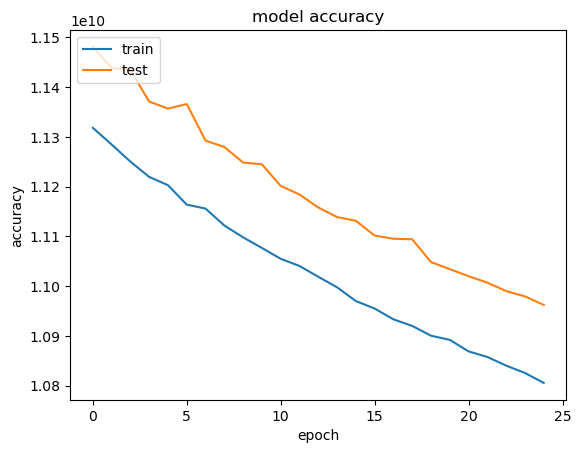

In [195]:
#summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

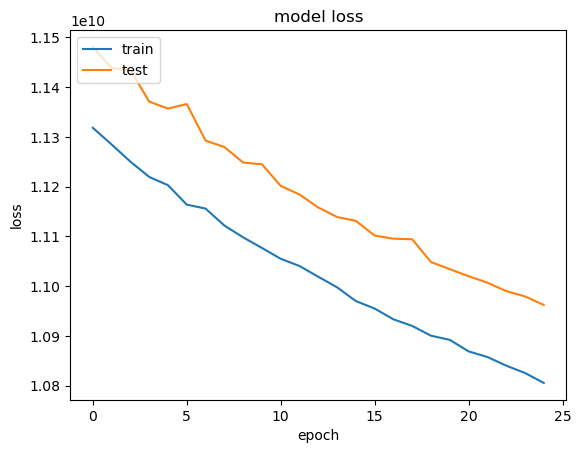

In [196]:
# summarize history for loss
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#Thank You................................................................